In [1]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.optimize
from scipy.optimize import minimize
from scipy.special import jv
#from scipy.ndimage import gaussian_filter1d
import sys

import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

import qgm
from qgm import image, parameter, filter, data, fitting, function

In [2]:
img_trans_ave_list = []

# Ferro

In [3]:
cmap_ferro = image.generate_cmap(['#330000', 'green', 'w'])

In [4]:
date = '20220908'
dataNo = 1
scanNo = 3

In [5]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [6]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat.tiff'))
    update_files = list(Path(path_img).glob('seq*_update.tiff'))
else:
    print('No images')

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

In [7]:
img_trans_ave_list.append(img_trans_ave)

Text(0.5, 1.0, 'Count')

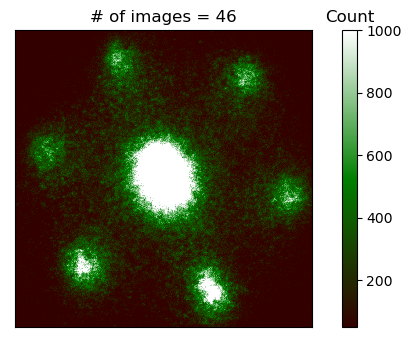

In [8]:
vmin = 50
vmax = 1000
xlim_1 = 0
xlim_2 = np.shape(img_trans_ave)[0]
ylim_1 = 0
ylim_2 = np.shape(img_trans_ave)[1]

fig =plt.figure(figsize=[15,10],dpi=100)
ax1 = fig.add_subplot(2,3,1)
mappable =ax1.pcolormesh(img_trans_ave, cmap=cmap_ferro,vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("# of images = %d"%(len(img_trans_list)))
# ax1.set_xlabel("x (pixel)")
# ax1.set_ylabel("y (pixel)")
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"Count", fontsize=12)

# 1D chain

In [9]:
cmap_1Dchain = image.generate_cmap(['#330000', '#8833ff', 'w'])

In [10]:
dataNo = 2
scanNo = 4
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [11]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat.tiff'))
    update_files = list(Path(path_img).glob('seq*_update.tiff'))
else:
    print('No images')

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

In [12]:
img_trans_ave_list.append(img_trans_ave)

Text(0.5, 1.0, 'Count')

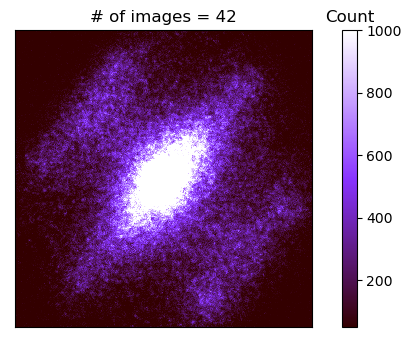

In [13]:
vmin = 50
vmax = 1000
xlim_1 = 0
xlim_2 = np.shape(img_trans_ave)[0]
ylim_1 = 0
ylim_2 = np.shape(img_trans_ave)[1]

fig =plt.figure(figsize=[15,10],dpi=100)
ax1 = fig.add_subplot(2,3,1)
mappable =ax1.pcolormesh(img_trans_ave, cmap=cmap_1Dchain,vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("# of images = %d"%(len(img_trans_list)))
# ax1.set_xlabel("x (pixel)")
# ax1.set_ylabel("y (pixel)")
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"Count", fontsize=12)

# Rhombic

In [14]:
cmap_Rhombic = image.generate_cmap(['#330000', '#3333dd', 'w'])

In [15]:
dataNo = 3
scanNo = 5
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [16]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat.tiff'))
    update_files = list(Path(path_img).glob('seq*_update.tiff'))
else:
    print('No images')

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

In [17]:
img_trans_ave_list.append(img_trans_ave)

Text(0.5, 1.0, 'Count')

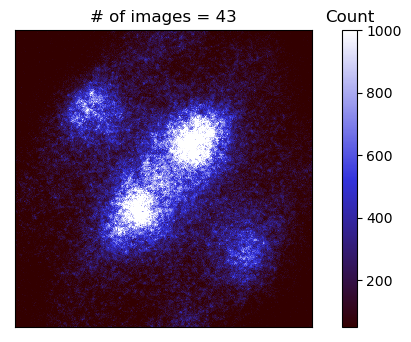

In [18]:
vmin = 50
vmax = 1000
xlim_1 = 0
xlim_2 = np.shape(img_trans_ave)[0]
ylim_1 = 0
ylim_2 = np.shape(img_trans_ave)[1]

fig =plt.figure(figsize=[15,10],dpi=100)
ax1 = fig.add_subplot(2,3,1)
mappable =ax1.pcolormesh(img_trans_ave, cmap=cmap_Rhombic,vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("# of images = %d"%(len(img_trans_list)))
# ax1.set_xlabel("x (pixel)")
# ax1.set_ylabel("y (pixel)")
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"Count", fontsize=12)

# Spiral 2

In [19]:
cmap_spiral2 = image.generate_cmap(['#330000', 'orange', 'w'])

In [20]:
dataNo = 4
scanNo = 6
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [21]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat.tiff'))
    update_files = list(Path(path_img).glob('seq*_update.tiff'))
else:
    print('No images')

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

In [22]:
img_trans_ave_list.append(img_trans_ave)

Text(0.5, 1.0, 'Count')

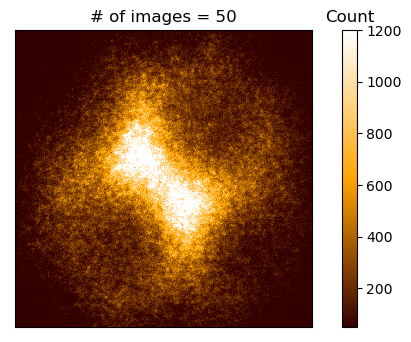

In [23]:
vmin = 50
vmax = 1200
xlim_1 = 0
xlim_2 = np.shape(img_trans_ave)[0]
ylim_1 = 0
ylim_2 = np.shape(img_trans_ave)[1]

fig =plt.figure(figsize=[15,10],dpi=100)
ax1 = fig.add_subplot(2,3,1)
mappable =ax1.pcolormesh(img_trans_ave, cmap=cmap_spiral2,vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("# of images = %d"%(len(img_trans_list)))
# ax1.set_xlabel("x (pixel)")
# ax1.set_ylabel("y (pixel)")
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"Count", fontsize=12)

# Staggered 1D chain

In [24]:
cmap_Staggered1Dchain = image.generate_cmap(['#330000', '#8d8800', 'w'])

In [25]:
dataNo = 5
scanNo = 7
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [26]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat.tiff'))
    update_files = list(Path(path_img).glob('seq*_update.tiff'))
else:
    print('No images')

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

In [27]:
img_trans_ave_list.append(img_trans_ave)

Text(0.5, 1.0, 'Count')

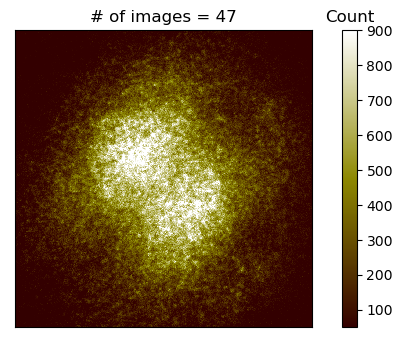

In [28]:
vmin = 50
vmax = 900
xlim_1 = 0
xlim_2 = np.shape(img_trans_ave)[0]
ylim_1 = 0
ylim_2 = np.shape(img_trans_ave)[1]

fig =plt.figure(figsize=[15,10],dpi=100)
ax1 = fig.add_subplot(2,3,1)
mappable =ax1.pcolormesh(img_trans_ave, cmap=cmap_Staggered1Dchain,vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("# of images = %d"%(len(img_trans_list)))
# ax1.set_xlabel("x (pixel)")
# ax1.set_ylabel("y (pixel)")
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"Count", fontsize=12)

# Spiral 1

In [29]:
cmap_Spiral1 = image.generate_cmap(['#330000', 'r', 'w'])

In [30]:
dataNo = 6
scanNo = 8
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [31]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat.tiff'))
    update_files = list(Path(path_img).glob('seq*_update.tiff'))
else:
    print('No images')

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

In [32]:
img_trans_ave_list.append(img_trans_ave)

Text(0.5, 1.0, 'Count')

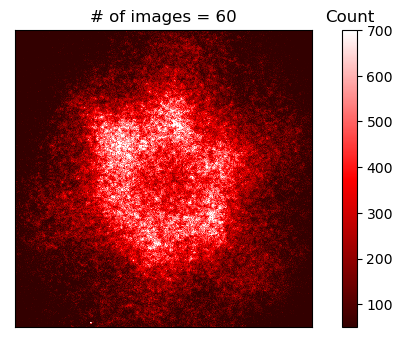

In [33]:
vmin = 50
vmax = 700
xlim_1 = 0
xlim_2 = np.shape(img_trans_ave)[0]
ylim_1 = 0
ylim_2 = np.shape(img_trans_ave)[1]

fig =plt.figure(figsize=[15,10],dpi=100)
ax1 = fig.add_subplot(2,3,1)
mappable =ax1.pcolormesh(img_trans_ave, cmap=cmap_Spiral1,vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("# of images = %d"%(len(img_trans_list)))
# ax1.set_xlabel("x (pixel)")
# ax1.set_ylabel("y (pixel)")
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"Count", fontsize=12)

# Mott Insulator

In [34]:
cmap_MI = image.generate_cmap(['#330000', 'gray', 'w'])

In [35]:
dataNo = 7
scanNo = 9
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [36]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat.tiff'))
    update_files = list(Path(path_img).glob('seq*_update.tiff'))
else:
    print('No images')

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

In [37]:
img_trans_ave_list.append(img_trans_ave)

Text(0.5, 1.0, 'Count')

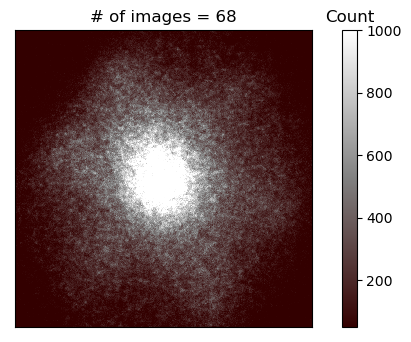

In [38]:
vmin = 50
vmax = 1000
xlim_1 = 0
xlim_2 = np.shape(img_trans_ave)[0]
ylim_1 = 0
ylim_2 = np.shape(img_trans_ave)[1]

fig =plt.figure(figsize=[15,10],dpi=100)
ax1 = fig.add_subplot(2,3,1)
mappable =ax1.pcolormesh(img_trans_ave, cmap=cmap_MI,vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("# of images = %d"%(len(img_trans_list)))
# ax1.set_xlabel("x (pixel)")
# ax1.set_ylabel("y (pixel)")
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"Count", fontsize=12)

# Summary

In [41]:
cmap_list = [cmap_ferro,cmap_1Dchain,cmap_Rhombic,cmap_spiral2,cmap_Staggered1Dchain,cmap_Spiral1,cmap_MI]
name_list = ["Ferro","1D chains", "Rhombic", "Spiral 2", "Staggered 1D chains", "Spiral 1", "MI"]
vmax_list = 0.8*np.array([1e3, 1e3, 1e3, 1.2e3,9e2,7e2, 1e3])

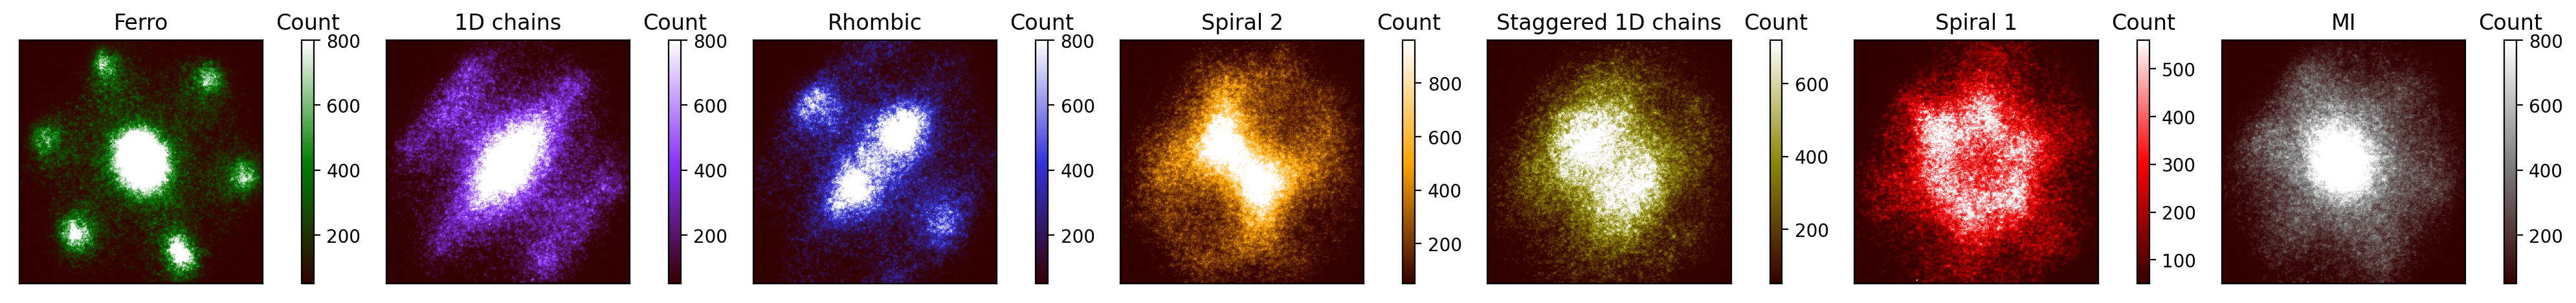

In [42]:
fig =plt.figure(figsize=[20,5],dpi=200)
for i in range(7):
    ax1 = fig.add_subplot(1,7,i+1)
    mappable =ax1.pcolormesh(img_trans_ave_list[i], cmap=cmap_list[i],vmin=vmin, vmax=vmax_list[i], shading='auto')
    ax1.set_aspect('equal')
    ax1.set_xlim(xlim_1,xlim_2)
    ax1.set_ylim(ylim_1,ylim_2)
    ax1.set_title(name_list[i])
    # ax1.set_xlabel("x (pixel)")
    # ax1.set_ylabel("y (pixel)")
    ax1.xaxis.set_visible(False)
    ax1.yaxis.set_visible(False)
    divider1 = make_axes_locatable(ax1)
    ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
    pp=fig.colorbar(mappable,cax=ax_cb1)
    pp.ax.set_title(r"Count", fontsize=12)
plt.tight_layout()